In [ ]:
#required packages with versions
!pip install numpy==1.21.2
!pip install seaborn==0.11.1
!pip install matplotlib==3.4.3
!pip install statsmodels==0.12.2
!pip install pandas==1.2.4
!pip install scipy==1.6.3
!pip install scikit_learn==0.24.2

In [4]:
import pandas as pd
pd.options.display.max_rows = 4000
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error

# THE DATA FILE CAN BE DOWNLOADED FROM 
# https://drive.google.com/file/d/1cLFGRApehOCmbhnvkHRmQ9DkWZZ6f4QX/view?usp=share_link 

In [7]:
 # When data is stored locally in this computer
df=pd.read_csv("C:\\Users\\Ecube\\Downloads\\EPL_Soccer_MLR_LR.csv")

# Alternatively one can directly download and unzip  data zip file from amazon s3

# AUTOMATED EDA

# BEFORE DESCRIBING TRADITIONAL STEPS OF EDA LET'S SEE USE OF PANDA'S MAGICAL PANDAS PROFILING LIBRARY. IT AVOIDS MANY MANUAL STEPS BELOW AND CAN DO ONE STEP EDA

In [1]:
!pip install pandas-profiling

In [2]:
from pandas_profiling import ProfileReport

In [10]:
report = ProfileReport(df, title="Pandas Profiling Report For Soccer Data")
report
report.to_file("Pandas Profiling Report For Soccer Data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# THE PROFILING REPORT CAN BE DOWNLOADED FROM https://drive.google.com/file/d/1svRwwf8d73qbMlEzxYIVXCIcJoqRq2zo/view?usp=share_link 
# AND OPENED IN ANY BROWSER 

#The report shows that there are 13 variables (11 numeric and 2 categorical), 202 observations,
0 missing values, 0 duplicate rows. Then it gives detailed description of each variable, one by one: whether variable is categorical or numerical. 

#If numerical,how many distinct values are there, how many missing values are there. Percentage of zeros and negative values, range (min value and maximum value) and histogram

#If categorical how many categories are there and what is percentage in each category and bar plot.

#It flags High cardinality and High correlation with each variable details in red colour

#It shows an interaction window where just by selecting any two variables one can see scatter plot of those two variables. (i.e. pair plots)This is important and discussed below

#It shows four types of correlation plots: Spearman's ρ,Pearson's r, Kendall's τ, Phik (φk)

#It shows a plot of missing values: Count-wise and nullity matrix wise

#Finally it shows first nine rows and last nine rows as a sample

# Score Vs. Distance Covered. No linear relationship.
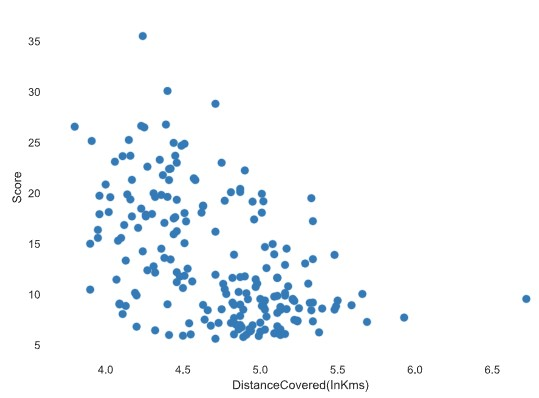

# Score Vs. Goals: No Linear Relationship.
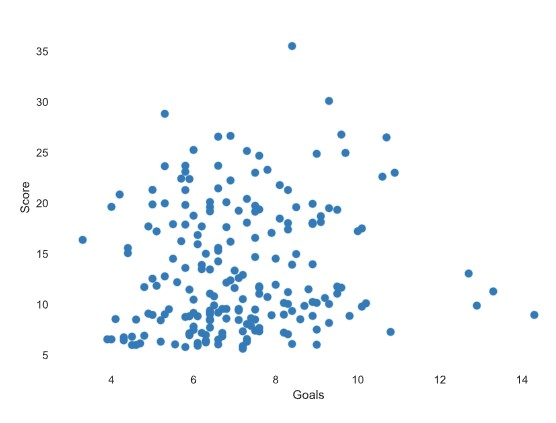

# Score Vs. Minutes To Goals Ratio: No Linear Relationship
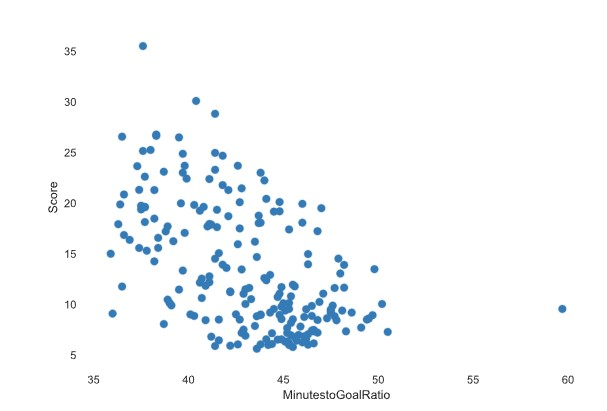

# Score Vs.Shots per game. No linear relationship
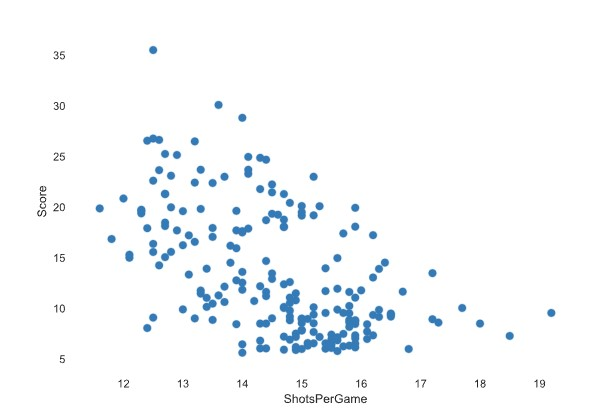

# Score Vs. Agent charge no linear relationship
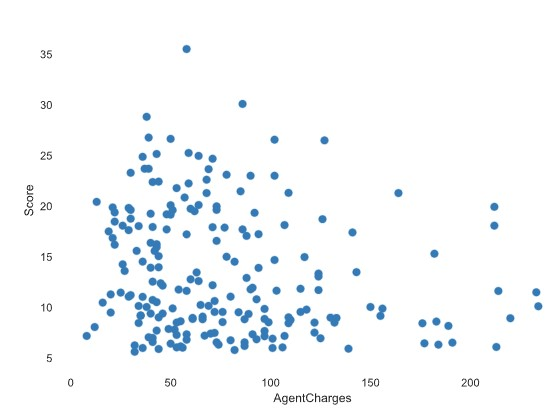

# Score Vs. BMI no linear relationship
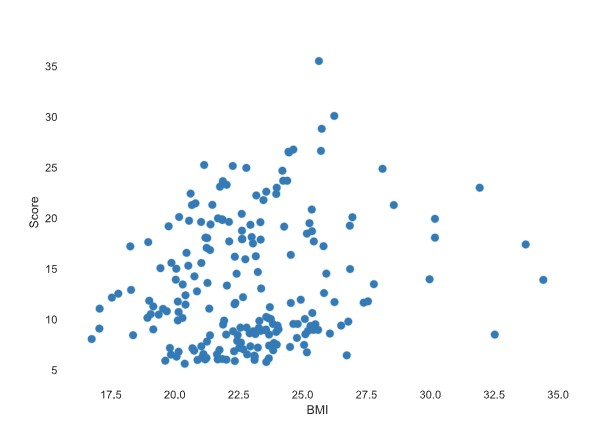

# Score Vs. Previous Club Cost no linear relationship
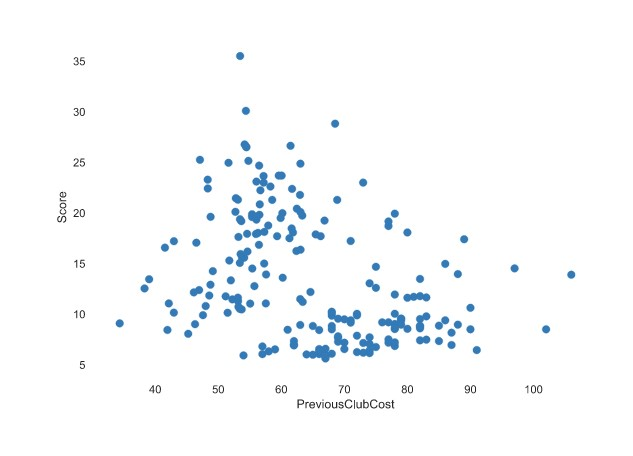

# Score Vs Height
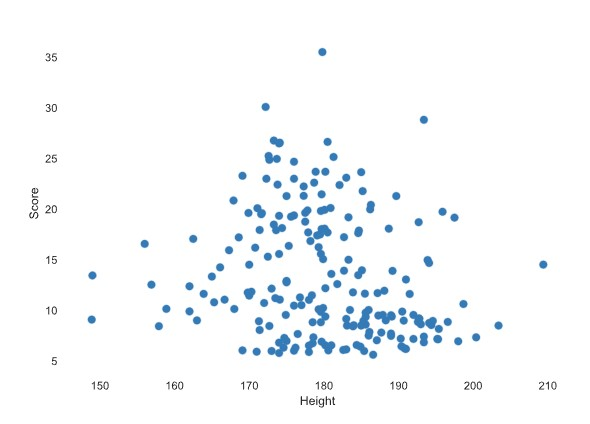

# Score Vs Weight
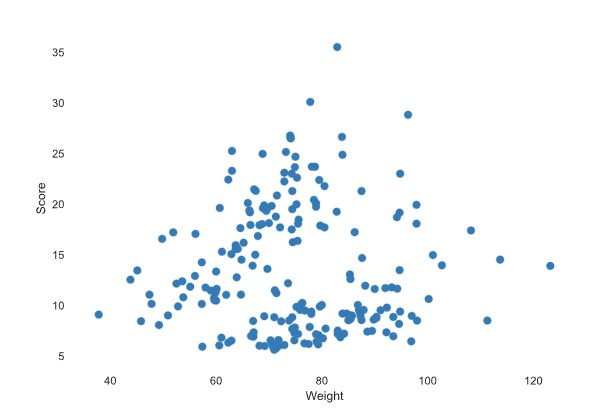

# Score Vs. Cost(Of Player) Nice linear relationship upto cost 125 to 150
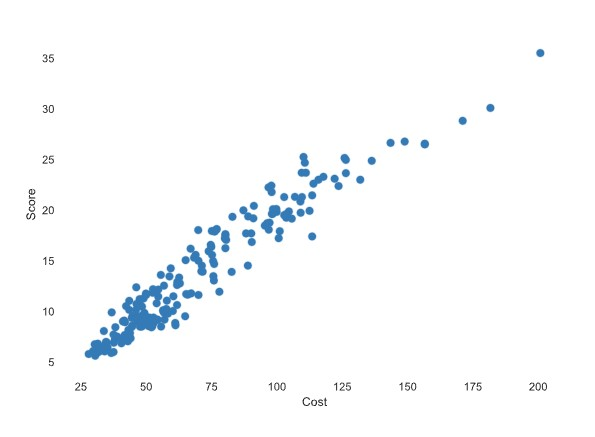

# Also correlation matrix later will show that Score and Cost have 96% correlation. So we can Start with a SLR/OLS model


$\hat{Score} = \hat{\beta}_{0} + \ Cost\hat{\beta}_{1} $

# INSTEAD OF USING PANDAS PROFILING WE CAN ALSO DO MANUAL EDA

In [4]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


#  ABOVE TABLE SHOWS STATISTICS FOR  NUMERICAL COLUMNS

In [5]:
# Now to get a sense of missing values get a sense of what format each variable is in
df.info()
# So total observations are 202 and all are non nulls for all columns
# Also PlayerName and Club are categorical/object/text variables and rest are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


# look at the correlations between the variables to identify best  predictor for response variable (score). This can save us from drawing multiple scatter plots as above as we must draw scatter plot only for Score Vs. highly correlated independent variable.

In [7]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


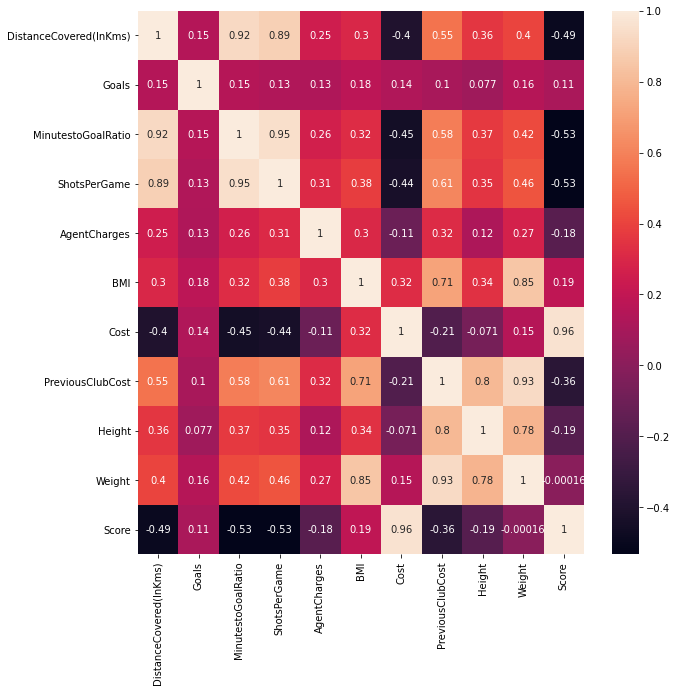

In [8]:
#heatmap
fig, ax = plt.subplots(figsize=(10,10))    # this line of code makes heatmap bigger
hmap=sns.heatmap(df.corr(), annot=True,ax=ax)

In [9]:
## If the given data has a large number of features, the correlation matrix can 
## become very big and hence difficult to interpret.

## Sometimes we might want to sort the values in the matrix and see the strength
## of correlation between various feature pairs in an increasing or decreasing order.
## Let us see how we can achieve this. */

## First, we will convert the given matrix into a one-dimensional Series of value
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()       # NOTE USE OF UNSTACK()

In [10]:
# Let us now sort these values using the sort_values() method of the Pandas Series.
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)
# Above 0.35 negative correlation with target variable score is of variables
#MinutestoGoalRatio, ShotsPerGame, PreviousClubCost 
# Above 0.35 positive correlation with target variable score is of variables
#  Cost(0.96 or 96%). Thus cost is the strongest predictor of score

MinutestoGoalRatio      Score                    -0.532449
Score                   MinutestoGoalRatio       -0.532449
ShotsPerGame            Score                    -0.531522
Score                   ShotsPerGame             -0.531522
                        DistanceCovered(InKms)   -0.493512
DistanceCovered(InKms)  Score                    -0.493512
Cost                    MinutestoGoalRatio       -0.449135
MinutestoGoalRatio      Cost                     -0.449135
ShotsPerGame            Cost                     -0.435429
Cost                    ShotsPerGame             -0.435429
DistanceCovered(InKms)  Cost                     -0.403004
Cost                    DistanceCovered(InKms)   -0.403004
Score                   PreviousClubCost         -0.361850
PreviousClubCost        Score                    -0.361850
                        Cost                     -0.207749
Cost                    PreviousClubCost         -0.207749
Height                  Score                    -0.1880

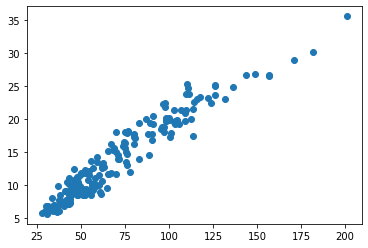

In [11]:
# As  cost is the strongest predictor of score, let's plot scatter plot of 
# cost vs score
plt.scatter(df['Cost'],df['Score'])

In [12]:
# Thus there is a strong linear association between cost and score upto cost of 
# 125. After cost=125 the linear model may have some issues.

In [13]:
# So we assign cost as independent variable X
X = df['Cost']

In [14]:
# And we assign Score as independent variable Y
Y = df['Score']

In [15]:
# Create X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,train_size=0.75, random_state=100)

In [16]:
# Using Ordinary Least Square regression from statsmodel sm
lr = sm.OLS(Y_train, X_train).fit()

In [17]:
# printing the parameters
lr.params
# Thus Score = 0.192* Cost (intercept parameter is not considered here)

Cost    0.192891
dtype: float64

In [18]:
lr.summary()
# Thus Score = 0.189* Cost TO Score = 0.196 * Cost with PROBABILITY 2.5% TO 97.5%
# R-SQUARED AND ADJUSTED R-SQUARED IS 98.7.BUT THERE IS NO INTERCEPT TERM.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                   3.84e-144
Time:                        10:38:28   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Getting results with the intercept term
# For this we first need to get X_train_with_intercept
X_train_with_intercept = sm.add_constant(X_train)
lr2 = sm.OLS(Y_train, X_train_with_intercept).fit()
lr2.summary()
# Thus Score = 0.9472 + 0.1821 * Cost 
# This model has R-Squared and adjusted R-squared 0.93.Thus 93% of the variance 
# IN NEW DATA can be explained using this model. So this is very good model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           6.91e-88
Time:                        10:38:28   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Next important value is F-statistics. F statistics tests the hypothesis whether the slope b1 is meaningful or not. If b1=0 that means predictor variable contains no LINEAR information about response variable. But here
# Prob (F-statistic): 	6.91e-88. So the odds are extremely small that null hypothesis (that b1=0) is true. So the slope b1 is not zero.

In [20]:
# In above linear regression reponse variable Y = B0 + B1 * X we can extract B0 and
# B1 as below

In [21]:
print(lr2.params)     

const    0.947185
Cost     0.182083
dtype: float64


In [22]:
# Thus lr2.params is an array and its zeroth element is intercept and first
# element is coefficient of Cost
b0 = lr2.params[0]         # intercept
print(b0)
b1 = lr2.params[1]         # Slope
print(b1)

0.9471853461853106
0.18208264626002543


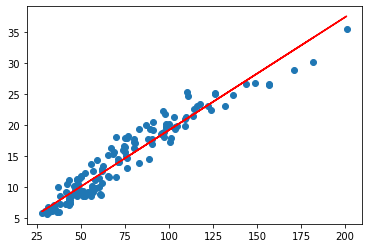

In [26]:
# Plot the fitted line on training data
plt.scatter(X_train,Y_train)
plt.plot(X_train,b0+b1*X_train,'r')
plt.show()

In [27]:
# Create predictions , using lr2 model on X_test data (with intercept)
X_test_with_intercept = sm.add_constant(X_test)
test_predict = lr2.predict(X_test_with_intercept)
# Create an empty dictionary to store matrix for above predictions
metrics_dict={}
# Use named dictionary elements to store various metrics
metrics_dict["mean absolute error"]= mean_absolute_error(Y_test,test_predict)
metrics_dict["mean_squared_error"] = mean_squared_error(Y_test,test_predict)
metrics_dict["r2_score"] = r2_score(Y_test,lr2.predict(X_test_with_intercept))
print(f'MAE={metrics_dict["mean absolute error"]}')
print(f'MSE ={metrics_dict["mean_squared_error"]}')
print(f'R_SQUARED = {metrics_dict["r2_score"]}')

MAE=1.2334115768152532
MSE =2.5402512466577445
R_SQUARED = 0.9085998317556193


In [ ]:
# So model seems to have very good metrics. However it is worth checking some
# basic assumptions made while we use linear regression. These are
# (1) Linearity between Y and X. So we need to check for non-linearity
# (2) Variance of residuals remains constant. So we need to check for non-constant variance
# (3) Histogram of residuals shows normal distribution
# (4) Errors not IID
# (5) There are no outliers
# (6) There are no missing predictors

# Checking Linearity assumption for train and test data

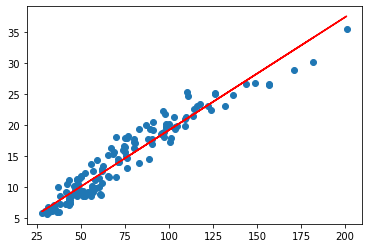

In [28]:
# Plot scattered plot of training data and plot 'line of fit' as per above model
# First scatter plot of X_train and Y_train
plt.scatter(X_train,Y_train)
# Now line plot of X_train versus predicted values of Y_train as per equation
# b0 + b1 * X_train where b- and b1 are obtained by lr2 model above.
plt.plot(X_train,b0+b1*X_train, 'r')
# create an empty dictionary to store plots
plots_dict={}
plots_dict["train_data_fitting"] =  plt
plt.show()

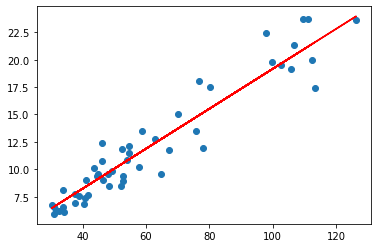

In [29]:
# get test data X_test with intercept
X_test_with_intercept = sm.add_constant(X_test)
# predict on fitted data
Y_test_fitted = lr2.predict(X_test_with_intercept)
# Plot scatter plot of X_test and Y_test
plt.scatter(X_test,Y_test)
# and fit the line as per model lr2 
plt.plot(X_test, Y_test_fitted, 'r')
plots_dict = {}
plots_dict["test_data_fitting"] = plt
plt.show()

# Checking 'Variance of residuals remains constant'. So we need to check for non-constant variance

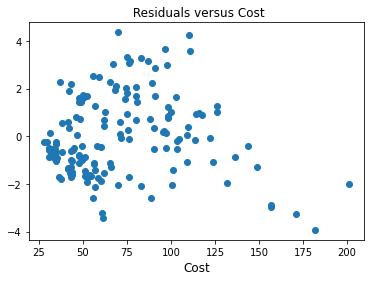

In [30]:
# First find predictions on training data, find residuals and plot residuals 
# vs. predictor for training data
# FIND PREDICTIONS ON TRAINING DATA
predictions_y = lr2.predict(X_train_with_intercept)
# FIND RESIDUALS I.E. ACTUAL TRAIN VALUES - PREDICTED TRAIN VALUES
residuals = (Y_train - predictions_y)
#Residuals vs. predictor in training data
plt.title(' Residuals versus Cost')
plt.xlabel('Cost',fontsize=12)
plt.scatter(X_train, residuals)
plots_dict = {}
plots_dict["residuals_vs_Cost"] = plt
plt.show()

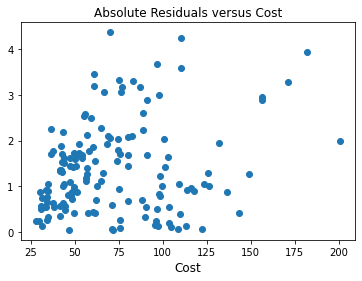

In [31]:
#Absolute residuals against predictor
absolute_residuals = np.abs(Y_train - predictions_y)
plt.title('Absolute Residuals versus Cost')
plt.xlabel('Cost',fontsize=12)
plt.scatter(X_train, absolute_residuals)
plots_dict = {}
plots_dict["Absolute_Residual_versus_cost"] = plt
plt.show()

In [32]:
# We can also plot test residuals versus cost and check for non-constant variance
test_residuals= (Y_test - Y_test_fitted)
print(len(Y_test))
print(len(Y_test_fitted))
print(len(test_residuals))

51
51
51


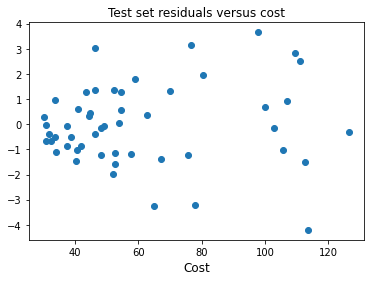

In [33]:
#Residuals Vs predictor scatter plot in test set
plt.scatter(X_test,test_residuals)
plt.title("Test set residuals versus cost")
plt.xlabel('Cost', fontsize=12)
plt.show()
# The plot shows some evidence of non-constant variance

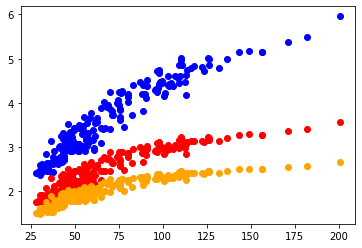

In [34]:
# We can deal with non-constant variance through transformations in target variable y
# Try squareroot transformation
sqrt_Y = np.sqrt(Y)
plt.scatter(X, sqrt_Y, color = 'blue')
# Try log transformation
ln_Y = np.log(Y)
plt.scatter(X, ln_Y, color = 'red')
# Try a Box-Cox transformation
bc_Y = list(stats.boxcox(Y))
bc_Y = bc_Y[0]
plt.scatter(X, bc_Y, color = 'orange')
# THE THREE GRAPHS SHOW THAT SQUARE-ROOT TRANSFORMATION/BLUE IS THE MOST EFFECTIVE
#FOR ENSURING CONSTANT VARIANCE


# CHECKING NORMALITY ASSUMPTION

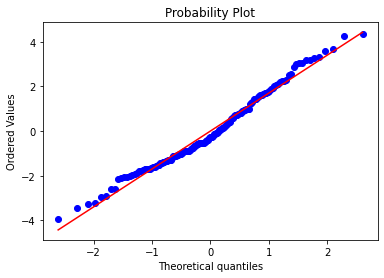

In [35]:
# Draw normality plot or probability plot using scipi. This is also
# called a QQ Plot
scipy.stats.probplot(residuals,plot=plt)
plots_dict = {}
plots_dict["Probability_Plot"] = plt
plt.show()

C:\Users\Ecube\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


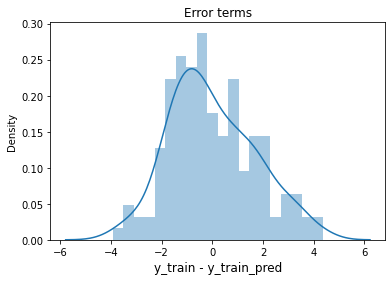

In [36]:
# Plotting the histogram using the residuals to evaluate normality
fig = plt.figure()
sns.distplot(residuals, bins=20)
plt.title("Error terms", fontsize = 12)
plt.xlabel('y_train - y_train_pred', fontsize=12)
plots_dict = {}
plots_dict["Error_Terms"] = plt
plt.show()
# Plot shows that normality assumption is valid 

# CHECKING FOR OUTLIERS USING BOXPLOT OF RESIDUALS

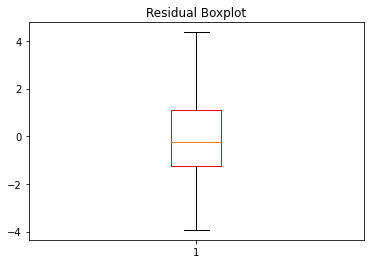

In [37]:
plt.boxplot(residuals, boxprops = dict(color = 'red'))
plt.title('Residual Boxplot')
plots_dict = {}
plots_dict["residual_box_plot"] =plt
plt.show()
# No outliers detected.

In [ ]:
# For checking missing predictors, instead of assuming that 'Score' depends 
# only on 'Cost' we should try including other predicators and build a multi-linear
# regression and check if that model gives better or poorer metrics. 
# See linear_regression_2 ipython  notebook for this.